In [1]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
# Read in the CSV file as a Pandas DataFrame

Income_df = pd.read_csv("Combined_Household_Income.csv")
Income_df.head()

,NAME,Households Total Income,"Households with Income under $10,000","Households with Income of $200,000 or more",Year
0,Alabama,2016448,7.6,6.7,2022
1,Alaska,274574,4.4,11.4,2022
2,Arizona,2850377,5.4,9.6,2022
3,Arkansas,1216207,7.3,5.5,2022
4,California,13550586,4.8,18.0,2022


In [3]:
# Pivot table to organize data using year

Total_Income_df =  Income_df.pivot_table(index='NAME',
                     columns='Year', 
                     values='Households Total Income').reset_index()
Total_Income_df.columns = ['NAME', 'HH_Total_Income_2020', 'HH_Total_Income_2021', 'HH_Total_Income_2022']
Total_Income_df.head()

,NAME,HH_Total_Income_2020,HH_Total_Income_2021,HH_Total_Income_2022
0,Alabama,1888504,1967559,2016448
1,Alaska,255173,271311,274574
2,Arizona,2643430,2817723,2850377
3,Arkansas,1170544,1183675,1216207
4,California,13103114,13429063,13550586


In [4]:
Under_10K_df = Income_df.pivot_table(index='NAME',
                     columns='Year', 
                     values='Households with Income under $10,000').reset_index()

Under_10K_df.columns = ['NAME', 'Under10K_2020', 'Under10K_2021', 'Under10K_2022']
Under_10K_df.head()

,NAME,Under10K_2020,Under10K_2021,Under10K_2022
0,Alabama,8.1,7.7,7.6
1,Alaska,3.8,5.4,4.4
2,Arizona,5.9,5.6,5.4
3,Arkansas,7.4,7.6,7.3
4,California,4.7,5.3,4.8


In [5]:
Over_200K_df = Income_df.pivot_table(index='NAME',
                     columns='Year', 
                     values='Households with Income of $200,000 or more').reset_index()
Over_200K_df.columns = ['NAME', 'Over200K_2020', 'Over200K_2021', 'Over200K_2022']
Over_200K_df.head()

,NAME,Over200K_2020,Over200K_2021,Over200K_2022
0,Alabama,4.4,5.2,6.7
1,Alaska,8.8,10.2,11.4
2,Arizona,6.4,8.1,9.6
3,Arkansas,4.0,4.7,5.5
4,California,13.3,15.5,18.0


In [6]:
# Merge dataframes

Temp_df = pd.merge(Total_Income_df,Under_10K_df,how="inner",on='NAME')

In [7]:
Final_Income_df = pd.merge(Temp_df,Over_200K_df,how="inner",on='NAME')
Final_Income_df.head()

,NAME,HH_Total_Income_2020,HH_Total_Income_2021,HH_Total_Income_2022,Under10K_2020,Under10K_2021,Under10K_2022,Over200K_2020,Over200K_2021,Over200K_2022
0,Alabama,1888504,1967559,2016448,8.1,7.7,7.6,4.4,5.2,6.7
1,Alaska,255173,271311,274574,3.8,5.4,4.4,8.8,10.2,11.4
2,Arizona,2643430,2817723,2850377,5.9,5.6,5.4,6.4,8.1,9.6
3,Arkansas,1170544,1183675,1216207,7.4,7.6,7.3,4.0,4.7,5.5
4,California,13103114,13429063,13550586,4.7,5.3,4.8,13.3,15.5,18.0


In [8]:
# Read in the CSV file as a Pandas DataFrame
Pop_df = pd.read_csv('Estimated Population 2020-2022.csv')

In [9]:
Pop_df.head()

,SUMLEV,NAME,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,NPOPCHG_2020,NPOPCHG_2021,NPOPCHG_2022,PPOPCHG_2020,PPOPCHG_2021,PPOPCHG_2022
0,10,United States,331511512,332031554,333287557,61992,520042,1256003,0.018703,0.156870,0.378278
1,20,Northeast Region,57448898,57259257,57040406,-160258,-189641,-218851,-0.278181,-0.330104,-0.382211
2,30,New England,15074473,15121745,15129548,-41733,47272,7803,-0.276081,0.313590,0.051601
3,30,Middle Atlantic,42374425,42137512,41910858,-118525,-236913,-226654,-0.278929,-0.559094,-0.537891
4,20,Midwest Region,68961043,68836505,68787595,-24494,-124538,-48910,-0.035506,-0.180592,-0.071052


In [10]:
# Rename the 'Name' column, sort

states = list(Pop_df["NAME"].unique())
sorted(states)

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'East North Central',
 'East South Central',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Middle Atlantic',
 'Midwest Region',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Mountain',
 'Nebraska',
 'Nevada',
 'New England',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Northeast Region',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pacific',
 'Pennsylvania',
 'Puerto Rico',
 'Rhode Island',
 'South Atlantic',
 'South Carolina',
 'South Dakota',
 'South Region',
 'Tennessee',
 'Texas',
 'United States',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West North Central',
 'West Region',
 'West South Central',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

In [13]:
# Merge dataFrames
Pop_Income_df = pd.merge(Pop_df,Final_Income_df,how="inner",on='NAME')
Pop_Income_df.columns

Index(['SUMLEV', 'NAME', 'POPESTIMATE2020', 'POPESTIMATE2021',
       'POPESTIMATE2022', 'NPOPCHG_2020', 'NPOPCHG_2021', 'NPOPCHG_2022',
       'PPOPCHG_2020', 'PPOPCHG_2021', 'PPOPCHG_2022', 'HH_Total_Income_2020',
       'HH_Total_Income_2021', 'HH_Total_Income_2022', 'Under10K_2020',
       'Under10K_2021', 'Under10K_2022', 'Over200K_2020', 'Over200K_2021',
       'Over200K_2022'],
      dtype='object')

In [14]:
# Drop columns that will not be needed
Pop_Income_df.drop(columns=['SUMLEV','POPESTIMATE2020', 'POPESTIMATE2021', 'POPESTIMATE2022',
       'NPOPCHG_2020', 'NPOPCHG_2021', 'NPOPCHG_2022'], inplace=True)
Pop_Income_df.columns

Index(['NAME', 'PPOPCHG_2020', 'PPOPCHG_2021', 'PPOPCHG_2022',
       'HH_Total_Income_2020', 'HH_Total_Income_2021', 'HH_Total_Income_2022',
       'Under10K_2020', 'Under10K_2021', 'Under10K_2022', 'Over200K_2020',
       'Over200K_2021', 'Over200K_2022'],
      dtype='object')

In [15]:
Pop_Income_df.head()

,NAME,PPOPCHG_2020,PPOPCHG_2021,PPOPCHG_2022,HH_Total_Income_2020,HH_Total_Income_2021,HH_Total_Income_2022,Under10K_2020,Under10K_2021,Under10K_2022,Over200K_2020,Over200K_2021,Over200K_2022
0,Alabama,0.139441,0.367376,0.484173,1888504,1967559,2016448,8.1,7.7,7.6,4.4,5.2,6.7
1,Alaska,-0.062042,0.171778,-0.081587,255173,271311,274574,3.8,5.4,4.4,8.8,10.2,11.4
2,Arizona,0.397622,1.182934,1.298301,2643430,2817723,2850377,5.9,5.6,5.4,6.4,8.1,9.6
3,Arkansas,0.087662,0.462047,0.578411,1170544,1183675,1216207,7.4,7.6,7.3,4.0,4.7,5.5
4,California,-0.092548,-0.907967,-0.290343,13103114,13429063,13550586,4.7,5.3,4.8,13.3,15.5,18.0


In [16]:
Pop_Income_df.loc[:,['PPOPCHG_2020', 'PPOPCHG_2021', 'PPOPCHG_2022']].head()

,PPOPCHG_2020,PPOPCHG_2021,PPOPCHG_2022
0,0.139441,0.367376,0.484173
1,-0.062042,0.171778,-0.081587
2,0.397622,1.182934,1.298301
3,0.087662,0.462047,0.578411
4,-0.092548,-0.907967,-0.290343


In [17]:
# Combine and find the average for columns with 3 years data
Pop_Income_df['AVG_PPOP_CHG'] = Pop_Income_df.loc[:,['PPOPCHG_2020', 'PPOPCHG_2021', 'PPOPCHG_2022']].mean(axis=1)

In [18]:
Pop_Income_df['AVG_HH_Total_Income'] = Pop_Income_df.loc[:,['HH_Total_Income_2020', 'HH_Total_Income_2021', 'HH_Total_Income_2022']].mean(axis=1)

In [19]:
Pop_Income_df['AVG_PERCENT_UNDER10K'] = Pop_Income_df.loc[:,['Under10K_2020', 'Under10K_2021', 'Under10K_2022']].mean(axis=1)

In [20]:
Pop_Income_df['AVG_PERCENT_OVER200K'] = Pop_Income_df.loc[:,['Over200K_2020','Over200K_2021', 'Over200K_2022']].mean(axis=1)

In [22]:
# Round total income data to 2 decimal places

round(Pop_Income_df.head(),2)

,NAME,PPOPCHG_2020,PPOPCHG_2021,PPOPCHG_2022,HH_Total_Income_2020,HH_Total_Income_2021,HH_Total_Income_2022,Under10K_2020,Under10K_2021,Under10K_2022,Over200K_2020,Over200K_2021,Over200K_2022,AVG_PPOP_CHG,AVG_HH_Total_Income,AVG_PERCENT_UNDER10K,AVG_PERCENT_OVER200K
0,Alabama,0.14,0.37,0.48,1888504,1967559,2016448,8.1,7.7,7.6,4.4,5.2,6.7,0.33,1957503.67,7.80,5.43
1,Alaska,-0.06,0.17,-0.08,255173,271311,274574,3.8,5.4,4.4,8.8,10.2,11.4,0.01,267019.33,4.53,10.13
2,Arizona,0.40,1.18,1.30,2643430,2817723,2850377,5.9,5.6,5.4,6.4,8.1,9.6,0.96,2770510.00,5.63,8.03
3,Arkansas,0.09,0.46,0.58,1170544,1183675,1216207,7.4,7.6,7.3,4.0,4.7,5.5,0.38,1190142.00,7.43,4.73
4,California,-0.09,-0.91,-0.29,13103114,13429063,13550586,4.7,5.3,4.8,13.3,15.5,18.0,-0.43,13360921.00,4.93,15.60


In [23]:
Train_Test_df = Pop_Income_df.loc[:, ['AVG_HH_Total_Income',
       'AVG_PERCENT_UNDER10K', 'AVG_PERCENT_OVER200K','AVG_PPOP_CHG']]
Train_Test_df.head()

,AVG_HH_Total_Income,AVG_PERCENT_UNDER10K,AVG_PERCENT_OVER200K,AVG_PPOP_CHG
0,1.957504e+06,7.800000,5.433333,0.330330
1,2.670193e+05,4.533333,10.133333,0.009383
2,2.770510e+06,5.633333,8.033333,0.959619
3,1.190142e+06,7.433333,4.733333,0.376040
4,1.336092e+07,4.933333,15.600000,-0.430286


In [24]:
Train_Test_df.columns

Index(['AVG_HH_Total_Income', 'AVG_PERCENT_UNDER10K', 'AVG_PERCENT_OVER200K',
       'AVG_PPOP_CHG'],
      dtype='object')

In [25]:
X = Train_Test_df.loc[:,['AVG_HH_Total_Income', 'AVG_PERCENT_UNDER10K', 'AVG_PERCENT_OVER200K']]
y = Train_Test_df['AVG_PPOP_CHG'].values

In [26]:
# Display sample data
X.head()

,AVG_HH_Total_Income,AVG_PERCENT_UNDER10K,AVG_PERCENT_OVER200K
0,1.957504e+06,7.800000,5.433333
1,2.670193e+05,4.533333,10.133333
2,2.770510e+06,5.633333,8.033333
3,1.190142e+06,7.433333,4.733333
4,1.336092e+07,4.933333,15.600000


In [27]:
y[:5]

array([ 0.33032987,  0.00938295,  0.95961936,  0.37604025, -0.4302862 ])

In [28]:
# train, test, split

X_train, X_test, y_train, y_test = \
  train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
# show shape and labels

print('Training', X_train.shape)
print('Training Label', len(y_train))
print('Test', X_test.shape)
print('Test Label', len(y_test))

Training (41, 3)
Training Label 41
Test (11, 3)
Test Label 11


In [31]:
# Use colTransformer to standardize, scale the data

colTransformer = ColumnTransformer([('standardize',
                                     StandardScaler(),
                                     ['AVG_HH_Total_Income', 'AVG_PERCENT_UNDER10K', 'AVG_PERCENT_OVER200K'])],
                                   remainder="passthrough")

In [32]:
colTransformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardize', StandardScaler(),
                                 ['AVG_HH_Total_Income', 'AVG_PERCENT_UNDER10K',
                                  'AVG_PERCENT_OVER200K'])])

In [33]:
X_train = colTransformer.transform(X_train)

In [34]:
X_test = colTransformer.transform(X_test)

In [35]:
model = LinearRegression()

In [36]:
model.fit(X_train, y_train)

LinearRegression()

In [37]:
pred = model.predict(X_test)

In [38]:
model.intercept_, model.coef_

(0.18243064934146347, array([ 0.02175261, -0.25656586, -0.22288243]))

In [39]:
# show predicted values
pred

array([ 0.37893826,  0.42987143,  0.06576367,  0.44735089,  0.26807433,
        0.14638223,  0.25806814,  0.38648526,  0.29314355, -0.04480252,
        0.13990485])

In [40]:
# show true values
y_test

array([ 0.56028957,  0.86434408,  0.34734686,  1.78440554,  1.00254532,
        0.38078819,  0.04746681,  0.2619363 ,  0.37604025, -0.87182791,
       -0.60293555])

In [41]:
# Measure the error
rmse_error = mean_squared_error(y_test, pred)**0.5

In [42]:

print(f"RMSE: {rmse_error:0.3f}")

RMSE: 0.602


Text(0.5, 1.0, 'Population Change')

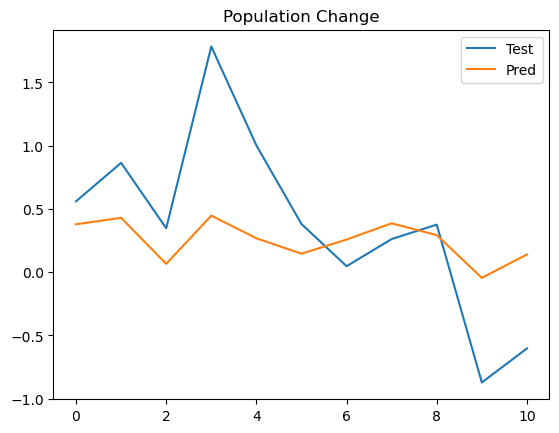

In [43]:
# Plot to show the test and prediction data

plt.plot(y_test, label='Test')
plt.plot(pred, label='Pred')
plt.legend()
plt.title('Population Change')